### Student Information
Name:
李宗陶
Student ID:
114062599
GitHub ID:
tower20021202@gmail.com

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [194]:
#先把所需的套件都import進來

import os
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap
#把hw所需的dataset讀進來
csv_path = "newdataset/Reddit-stock-sentiment.csv"
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"請確認目前工作目錄在專案根目錄，且路徑 {csv_path} 存在。")
#確定是否讀取到檔案
df = pd.read_csv(csv_path)

# 確認欄位
print(df.columns)

# 標籤分布統計
print(df["label"].value_counts())



Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')
label
 0.0    423
-1.0    315
 1.0    109
Name: count, dtype: int64


[nltk_data] Downloading package punkt to /Users/lizongtao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [195]:
df.head()
print(df.type.value_counts())
df.label.value_counts()
df.label[0:10]
#df.label[0]

type
comment    783
post        64
Name: count, dtype: int64


0   -1.0
1    0.0
2    0.0
3    1.0
4   -1.0
5    0.0
6   -1.0
7    0.0
8    1.0
9    1.0
Name: label, dtype: float64

## exercise1

following the exercise1,we need to print out the text data for the first three samples in the dataset


In [196]:
for i in range(3):
    print(df.text[i])

Calls on retards
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
Seeing lots of red in the ticker.


In [197]:
print("物件型態:", type(df))

# 如果是 DataFrame，就印出欄位
if isinstance(df, pd.DataFrame):
    print("DataFrame 欄位:", df.columns.tolist())
    print("前五筆資料:\n", df.head())

# 如果是 sklearn Bunch，就印出 keys
elif hasattr(df, 'keys'):
    print("Bunch keys:", df.keys())
    print("data shape:", df.data.shape if hasattr(df, 'data') else None)
    print("target shape:", df.target.shape if hasattr(df, 'target') else None)

# 其他情況
else:
    print("未知型態，內容:", dir(df)[:20])  # 先印前20個屬性觀察


物件型態: <class 'pandas.core.frame.DataFrame'>
DataFrame 欄位: ['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']
前五筆資料:
       type             datetime  post_id         subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w    wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9    wallstreetbets   
2  comment  2025-04-10 15:09:41  mmeevio       StockMarket   
3     post  2023-08-30 17:12:55  165kllm  stockstobuytoday   
4  comment  2025-04-11 14:48:05  mmkl6bw       StockMarket   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   
3                              Who knows more? $VMAR             emi

In [198]:
X = pd.DataFrame.from_records(
    [[" ".join(str(d).split("\n")).strip('\n\t')] for d in df["text"]],
    columns=["text"]
)

In [199]:
X['label'] = df['label']

### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [200]:
# 把subreddit欄位加入X並篩選 subreddit 屬於 ["wallstreetbets", "StockMarket"] 的資料
X['subreddit'] = df['subreddit']
X_subset = X[X['subreddit'].isin(["wallstreetbets", "StockMarket"])]
print(X_subset.head())


                                                text  label       subreddit
0                                   Calls on retards   -1.0  wallstreetbets
1  Stunt as in like why did they even make a big ...    0.0  wallstreetbets
2                  Seeing lots of red in the ticker.    0.0     StockMarket
4                           He didn’t say thank you.   -1.0     StockMarket
5  Hoping to ejaculate in wet warm puss tonight, ...    0.0  wallstreetbets


### **>>> Exercise 3 :**  
Try to fetch records belonging to the ```wallstreetbets``` category, and query every 10th record. Only show the first 5 records.

In [201]:
X[X['subreddit']=="wallstreetbets"][::10][:5]

,text,label,subreddit
0,Calls on retards,-1.0,wallstreetbets
40,These China AI factory memes are pretty good. ...,0.0,wallstreetbets
96,200k loss in a month.. haha,-1.0,wallstreetbets
183,My resume isn't even read by companies anymore...,-1.0,wallstreetbets
227,#Ban Bet Lost /u/Local-Wall-4359 made a bet t...,0.0,wallstreetbets


### >>> **Exercise 4 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [202]:
#計算X中每一列的遺失值
X.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [203]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [204]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [205]:
#answer
#和master的exercise5相同，因為np.nan,None都被視為缺失值，第一列也是缺失值，但'NaN','None',''則只視為字串並不是缺失值

In [206]:
#找出X中重複的列
duplicates = X[X.duplicated(keep=False)]
print(duplicates)

                                                  text  label  \
34   So they went from saying redditors are bad for...    1.0   
42   So they went from saying redditors are bad for...    1.0   
70           Updated Daily by EOD     [Daily Shorts]()    0.0   
105               [World Markets (stockbuyvest.com)]()    0.0   
159  Gappers for today   [Gappers (stockbuyvest.com...    0.0   
160  how does the futures market look today  SPY, E...    0.0   
179  This data is from FINRA ATS - Updated Weekly  ...    0.0   
192  Summarized with Highlights, updated weekly be ...    0.0   
284  &#x200B;   [Cryptocurrency Prices, Charts, Dai...    0.0   
349          Updated Daily by EOD     [Daily Shorts]()    0.0   
352  how does the futures market look today  SPY, E...    0.0   
387  This data is from FINRA ATS - Updated Weekly  ...    0.0   
409  Upgrades, Downgrades   [Stock Analyst Recommen...    0.0   
421  Stocks that are trending up today   [Popping (...    0.0   
432  &#x200B;   [Cryptocu

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [207]:
X_sample = X.sample(500, random_state=42)
print(len(X_sample))
print(X_sample)
#可以發現X_sample中在對X取sample後他的順序會被打亂，Ｘ_sample的列數是sample所設定的列數

500
                                                  text  label  \
457                                          "We" who?    0.0   
342                                     Chicken jockey    0.0   
280                                      Not great Bob   -1.0   
275  Speak for yourself, my wife is being harder on...    0.0   
843                             Where can I read this?    0.0   
..                                                 ...    ...   
305  You can evaluate the price of a company by loo...   -1.0   
354  China is a neoauthoritarian state.   Xi Jingpi...   -1.0   
25   You see, Target, pissing off a good chunk of y...   -1.0   
628  Remember when Conservatives though it was impr...    0.0   
169  Just stumbled upon some exciting news about St...    1.0   

            subreddit  
457       StockMarket  
342    wallstreetbets  
280       StockMarket  
275    wallstreetbets  
843       StockMarket  
..                ...  
305    wallstreetbets  
354       StockMarket  

### >>> **Exercise 7 (Watch Video):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

subreddit
stocks              274
StockMarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64


<Axes: title={'center': 'Subreddit Distribution'}, xlabel='subreddit'>

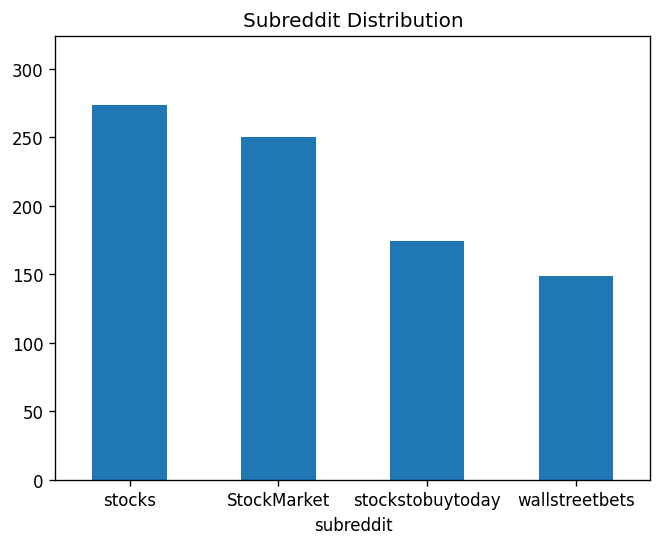

In [208]:
print(X.subreddit.value_counts())
#根據subreddit欄位的值來做圖
import plotly.express as plt
#將y軸的範圍自動設定為subreddit的最大值+50
X.subreddit.value_counts().plot(kind='bar', title='Subreddit Distribution',
                                ylim=(0,X.subreddit.value_counts().max()+50),
                                rot=0)


### >>> **Exercise 8 (take home):** 
將原本X和X_sample 的subreddit作比較並畫成圖

<Axes: title={'center': 'Subreddit Distribution Comparison'}, xlabel='subreddit'>

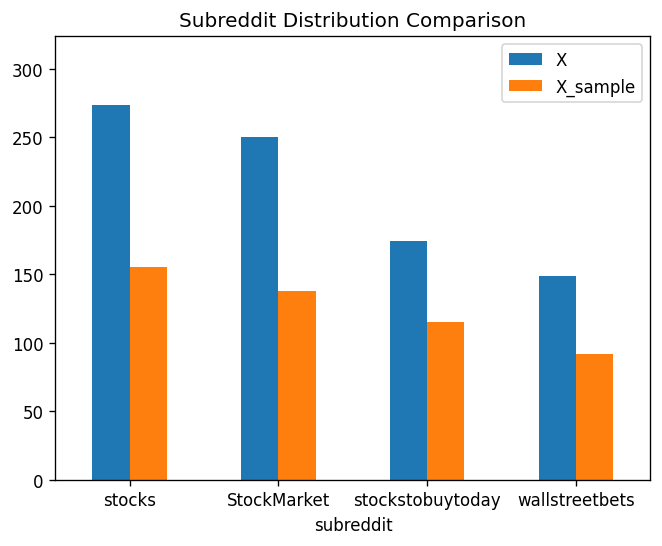

In [209]:
count_X=X.subreddit.value_counts()
count_X_sample=X_sample.subreddit.value_counts()
df_compare=pd.DataFrame({
    'X':count_X,
    'X_sample':count_X_sample   
})
df_compare.plot(kind='bar',title='Subreddit Distribution Comparison',
                ylim=(0,max(count_X.max(),count_X_sample.max())+50),
                rot=0)


### **>>> Exercise 9 (Watch Video):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!


In [210]:
#先把詞向量話
#再透過analyze來看CountVectorizer的斷詞結果
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")
from sklearn.feature_extraction.text import CountVectorizer
import helpers.data_mining_helpers as dmh
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
analyze=count_vect.build_analyzer()
print(analyze(X.text[1]))#查看text[1]的斷詞結果

['stunt', 'as', 'in', 'like', 'why', 'did', 'they', 'even', 'make', 'big', 'deal', 'about', 'starting', 'it', 'in', 'the', 'first', 'place', 'no', 'company', 'should', 'ever', 'talk', 'about', 'politics', 'ever']


[nltk_data] Downloading package punkt to /Users/lizongtao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/lizongtao/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [211]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [212]:
count_vect.get_feature_names_out()[0:30]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100',
       '1000', '10000', '100k', '100x', '10k', '10ks', '10yr', '11',
       '116', '118', '12', '1242', '125', '12855584', '13', '14', '140',
       '145', '14th', '15'], dtype=object)

### **>>> Exercise 10 (take home):**
從上面可以發現第四筆資料有一個值不為零，下面code顯示該不為0的資料所代表的term以及出現次數


In [213]:


# 取出所有詞彙
terms = count_vect.get_feature_names_out()
# 找出非零的位置
row_idx, col_idx = np.nonzero(X_counts[0:5, 0:100])
# 列出文件 index、詞、數值
for r, c in zip(row_idx, col_idx):
    print(f"Doc {r}, Term='{terms[c]}', Count={X_counts[r, c]}")


Doc 3, Term='116', Count=3


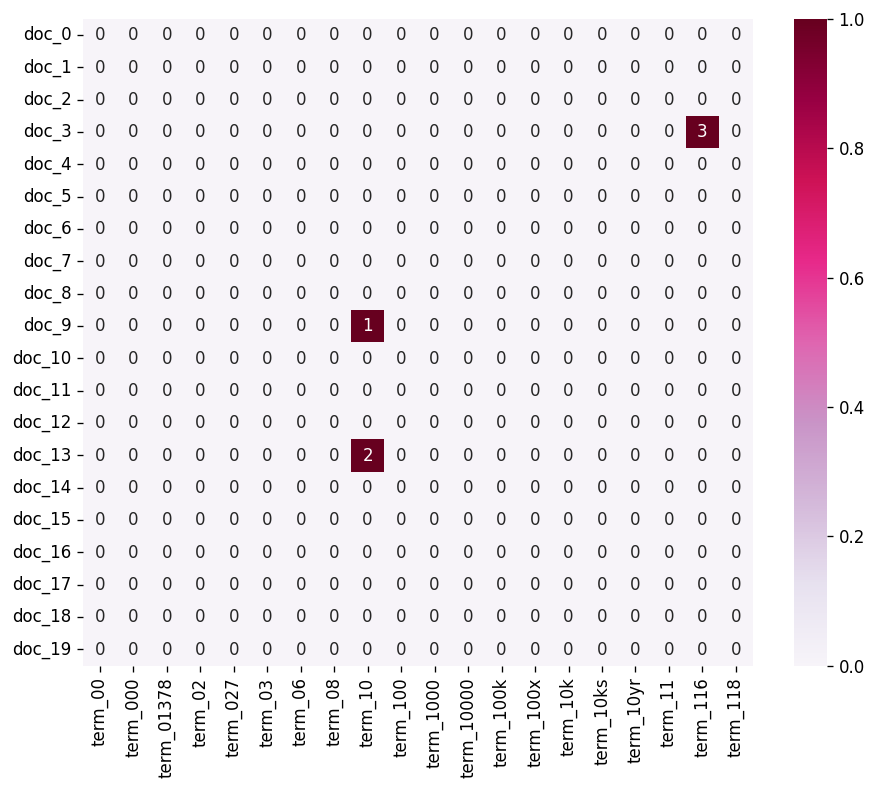

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                cmap="PuRd",
                vmin=0, vmax=1, annot=True)

### **>>> Exercise 11 (take home):** 
將doc1和2的文章出現的term用熱力圖來呈現，扣掉出現0次的term避免矩陣過於稀疏


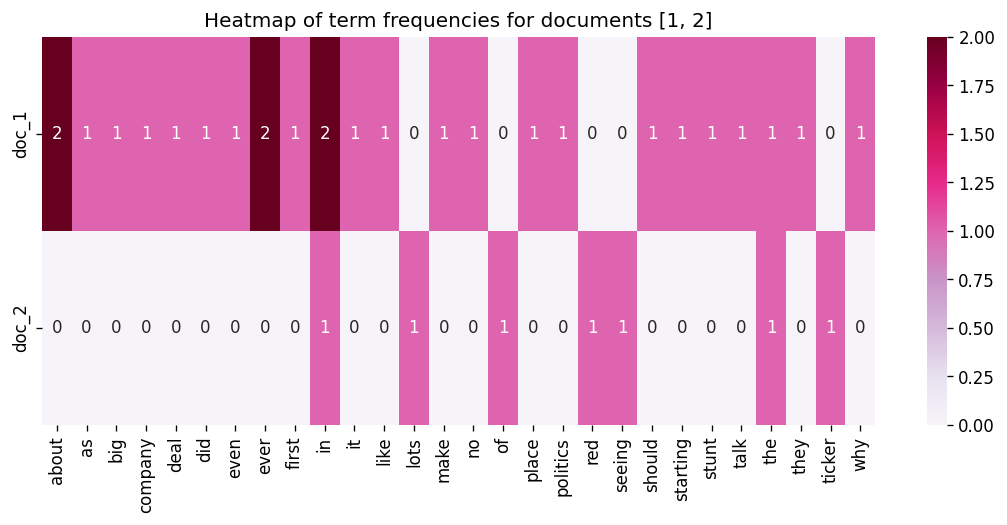

In [215]:
#選擇doucument 1和2並用熱力圖標示其中出現的terms_frequency，扣掉出現0次的terms以避免造成sparse matrix
from scipy import sparse
doc_ids = [1, 2]  

# 取出這兩篇文件的詞頻矩陣
X_array = X_counts[doc_ids, :].toarray()

# 只保留在這兩篇文件中出現過的詞
nonzero_idx = np.where(X_array.sum(axis=0) > 0)[0]
terms = count_vect.get_feature_names_out()[nonzero_idx]

# 建立 DataFrame
df_multi = pd.DataFrame(X_array[:, nonzero_idx], 
                        columns=terms, 
                        index=[f"doc_{i}" for i in doc_ids])
plt.figure(figsize=(max(10, len(terms) * 0.4), len(doc_ids) * 0.6 + 3))
ax = sns.heatmap(df_multi, cmap="PuRd", annot=True, fmt="g", cbar=True)
ax.set_title(f"Heatmap of term frequencies for documents {doc_ids}")
plt.show()

### >>> **Exercise 12 (take home):**
畫出term_frequency的表以及他所對應的詞，只取前100個出現的詞分別出現的頻率，並非數量


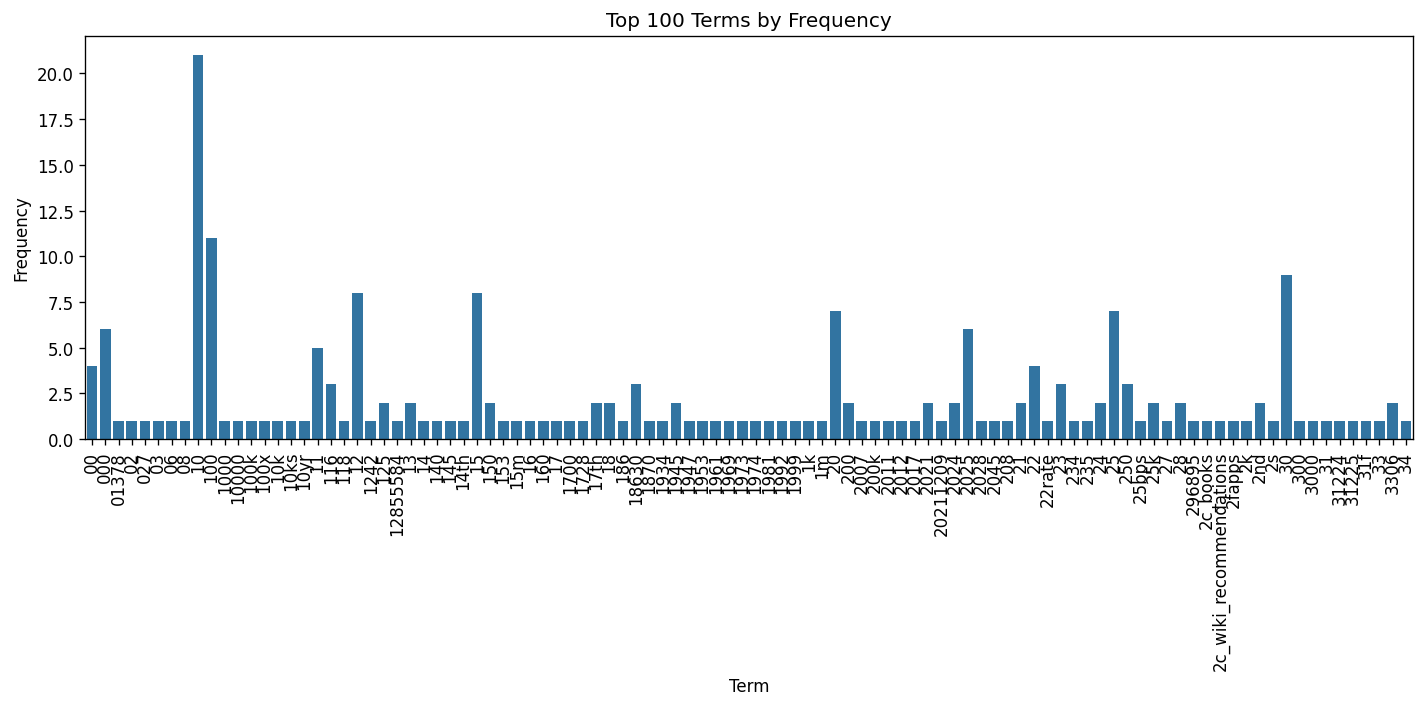

In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

vocab = count_vect.get_feature_names_out()
assert X_counts.shape[1] == len(vocab)

term_counts = np.asarray(X_counts.sum(axis=0)).ravel()

N = 100
df_terms = (pd.DataFrame({"term": vocab, "freq": term_counts})
            .head(N)
)
plt.figure(figsize=(max(12, len(df_terms)*0.08), 6))
ax = sns.barplot(data=df_terms, x="term", y="freq")
ax.set_title(f"Top {len(df_terms)} Terms by Frequency")
ax.set_xlabel("Term")
ax.set_ylabel("Frequency")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### >>> **Exercise 13 (take home):** 
上個圖表可以發現有些詞出現頻率很低，導致圖表很稀疏，因此下面將呈現輸出頻率為2以上的圖以壁面圖表過於稀疏



In [217]:
#因為上一個exercise可以明顯看出有些詞的term_frequency非常低，導致圖表過於稀疏，會造成300個terms中有超過一半的terms頻率都在10以下，視覺話相當浪費時間
#因此改成用term_frequency >= 2的terms來畫圖
df = pd.DataFrame({
    "Term":count_vect.get_feature_names_out()[:100],
    "Frequency":term_counts[:100]
})
df=df[df["Frequency"]>=2]

# 繪圖
fig = px.bar(
    df,
    x="Term",
    y="Frequency",
    title="Term Frequencies (TF ≥ 2)"
)

# 調整 x 軸標籤角度與圖大小
fig.update_layout(
    xaxis=dict(tickangle=90),  # Plotly 要用 tickangle
    width=2000,
    height=600
)

fig.show()


### >>> **Exercise 14 (take home):** 
將頻率用降冪來呈現可以簡單辨認出詞頻率由高至低

In [218]:
df = df.sort_values("Frequency", ascending=False)
fig = px.bar(
    df,
    x="Term",
    y="Frequency",
    title="Term Frequencies (TF ≥ 2)"
)

fig.show()

### >>> **Exercise 15 (take home):** 
因為如果直接使用頻率分布的話，有些term出現的頻率過高會導致有些只出現少數次的詞在圖表顯示乎沒有，因此可以將頻率取log後可使頻率分布圖看起來不會差異過大


In [219]:
import math
term_frequencies_log = [math.log(i) for i in term_counts]
#對所前300個terms的頻率取log後再畫出來可以發現可以將頻率差異過大的term拉近，高頻率的term不會像之前一樣高到爆炸，低頻的term也不會低到幾乎看不見
df = pd.DataFrame({
    "Term":count_vect.get_feature_names_out()[:300],
    "Frequency":term_frequencies_log[:300]
})

df = df.sort_values("Frequency", ascending=False)
# 繪圖
fig = px.bar(
    df,
    x="Term",
    y="Frequency",
    title="Term Frequencies"
)

# 調整 x 軸標籤角度與圖大小
fig.update_layout(
    xaxis=dict(tickangle=90),  # Plotly 要用 tickangle
    width=2000,
    height=600
)

fig.show()


### phase 1的第三階段
新的資料集上，產生有意義的全新資料視覺化

In [220]:
# === 基本載入與前處理 ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")

# 型別處理
df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")
for col in ["label","upvotes","downvotes","upvote_ratio"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# 文字與衍生欄位
df["text"] = df["text"].fillna("")
df["char_len"] = df["text"].str.len()
df["word_len"] = df["text"].str.split().str.len()
df["hour"] = df["datetime"].dt.hour

label_map = {-1.0:"negative", 0.0:"neutral", 1.0:"positive"}
df["label_name"] = df["label"].map(label_map).fillna("unknown")

# 小工具：讓圖比較緊湊
plt.rcParams.update({"figure.dpi": 120})


顯示情緒分布統計
用來先看類別是否失衡，判斷是否影響後續模型評估與抽樣策略。

根據圖表可發現 neutral/negative 遠多於 positive，資料類別是失衡的，之後需做資料不平衡處理，以免被表面的accuracy所誤導。

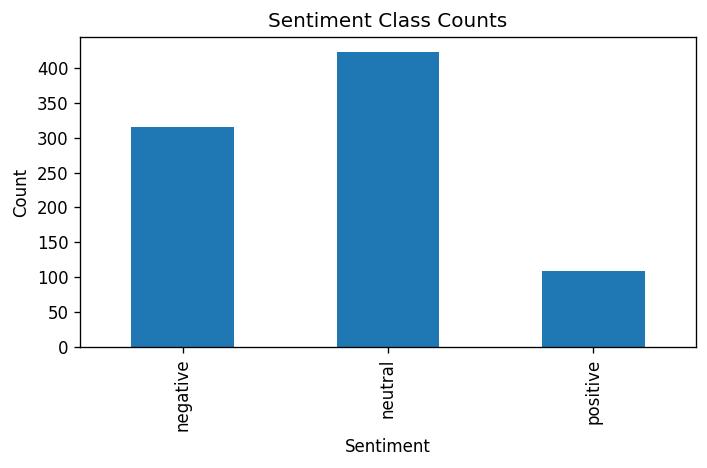

In [221]:

counts = (df["label_name"]
          .value_counts()
          .reindex(["negative","neutral","positive","unknown"])
          .dropna())

plt.figure(figsize=(6,4))
counts.plot(kind="bar")
plt.title("Sentiment Class Counts")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


Subreddit 排名分布，用於掌握主要資料來源，之後可分社群做模型或錯誤分析。

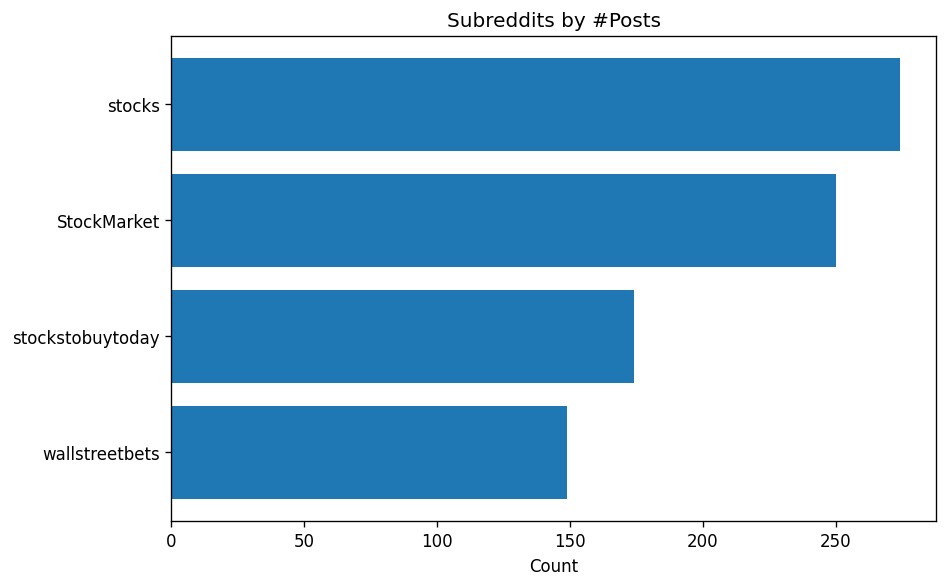

In [222]:
sub_counts = df["subreddit"].value_counts().head(10)[::-1]  # 呈現水平條
plt.figure(figsize=(8,5))
plt.barh(sub_counts.index, sub_counts.values)
plt.title("Subreddits by #Posts")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

文字長度分布
用來辨別不同情緒的貼文是否有不同文字長度分布（例如正向是否較長/較短）

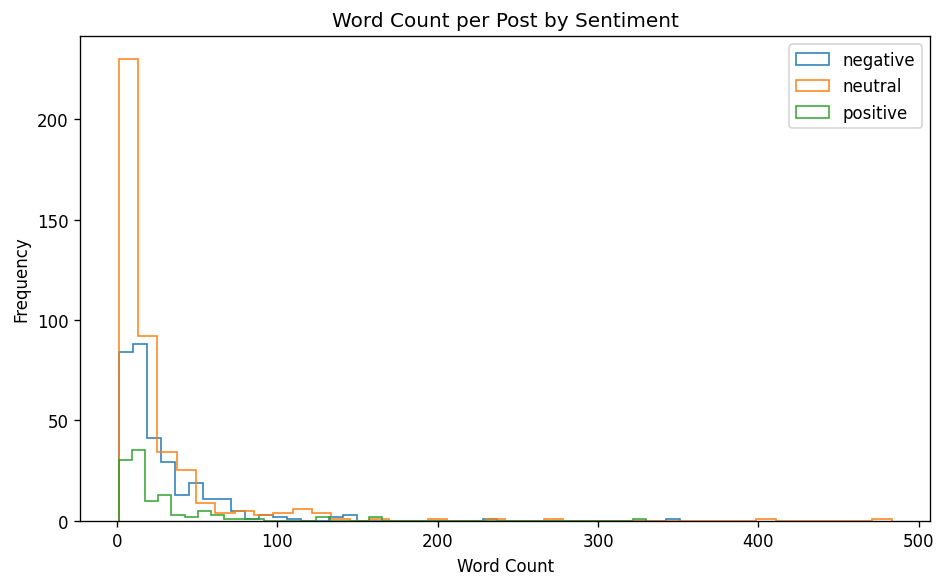

In [223]:
plt.figure(figsize=(8,5))
for name in ["negative","neutral","positive"]:
    s = df.loc[df["label_name"]==name, "word_len"].dropna()
    if not s.empty:
        # 需屎用 step 型 histogram，使重疊還是能看懂
        plt.hist(s, bins=40, histtype="step", label=name, alpha=0.9)
plt.legend()
plt.title("Word Count per Post by Sentiment")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


Upvotes對比情緒（盒鬚圖，去除極端值）
用來查看不同情緒是否有明顯的互動量（upvotes）差異。
根據圖可以發現雖然三種情緒的中心差不多，但「negative」貼文的讚數波動更大、偶爾衝很高，netural and postive較穩定、尾巴較短

/var/folders/_f/n2s2r8xd6d18txb7ckxwvq_m0000gn/T/ipykernel_77686/2167356201.py:10: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



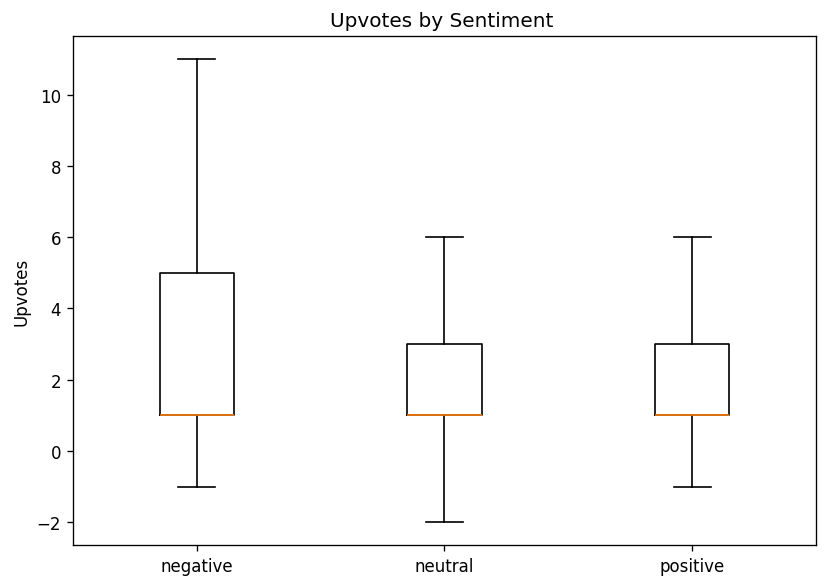

In [224]:
df_plot = df[["label_name","upvotes"]].dropna()
if not df_plot.empty:
    q99 = df_plot["upvotes"].quantile(0.99)
    df_plot["upvotes_clipped"] = df_plot["upvotes"].clip(upper=q99)

    groups = [df_plot.loc[df_plot["label_name"]==n, "upvotes_clipped"].values
              for n in ["negative","neutral","positive"]]

    plt.figure(figsize=(7,5))
    plt.boxplot(groups, labels=["negative","neutral","positive"], showfliers=False)
    plt.title("Upvotes by Sentiment ")
    plt.ylabel("Upvotes")
    plt.tight_layout()
    plt.show()


每小時的發文量（情緒和發文時段）
判斷不同情緒在一天中的何時較常出現，以及何時發文較多
但根據圖表顯示情緒跟發文時段沒有明顯關係，只免強看得出下午發文情緒是免搶看得出下午發文情緒是postive的明顯較少

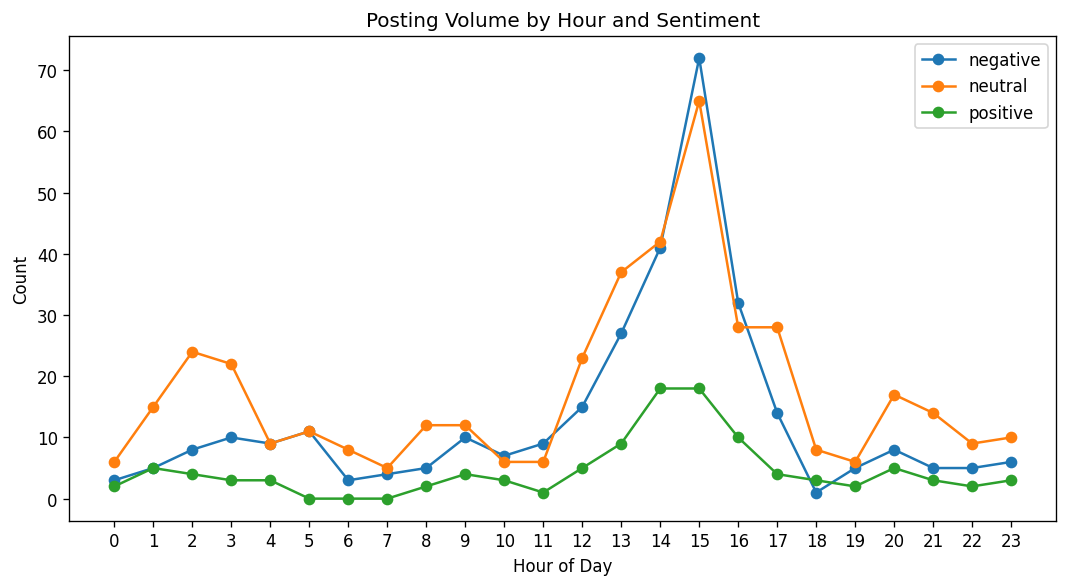

In [225]:
g = (df.dropna(subset=["hour"])
       .groupby(["hour","label_name"])
       .size()
       .reset_index(name="count"))

pivot = g.pivot(index="hour", columns="label_name", values="count").fillna(0)

plt.figure(figsize=(9,5))
for name in ["negative","neutral","positive"]:
    if name in pivot.columns:
        plt.plot(pivot.index, pivot[name], label=name, marker="o")
plt.xticks(range(0,24))
plt.title("Posting Volume by Hour and Sentiment")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()


### phase 1的第四階段
根據phase1規定，有把每個exercise用區塊隔開方便助教們閱讀

In [226]:
### Begin Assignment Here